In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_excel("Documents/xanthum gum.xlsx")

In [3]:
df

,X1,X2,X3,X1 .1,X2 .1,X3 .1,Observed,Predicted
0,-1,-1,0,1,2,7.5,7.22,7.15
1,1,-1,0,3,2,7.5,7.52,7.54
2,-1,1,0,1,6,7.5,4.58,4.56
3,1,1,0,3,6,7.5,6.45,6.52
4,-1,0,-1,1,4,0.0,4.47,4.51
5,1,0,-1,3,4,0.0,5.67,5.63
6,-1,0,1,1,4,15.0,6.46,6.50
7,0,0,1,3,4,15.0,7.76,7.72
8,0,0,-1,2,2,0.0,6.65,6.67
9,0,1,-1,2,6,0.0,4.52,4.49


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X1          17 non-null     int64  
 1   X2          17 non-null     int64  
 2   X3          17 non-null     int64  
 3   X1 .1       17 non-null     int64  
 4   X2 .1       17 non-null     int64  
 5   X3 .1       17 non-null     float64
 6   Observed    17 non-null     float64
 7   Predicted   17 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.2 KB


In [5]:
df.columns

Index(['X1 ', 'X2 ', 'X3 ', 'X1 .1', 'X2 .1', 'X3 .1', 'Observed ',
       'Predicted '],
      dtype='object')

In [6]:
#dropping leaky columns
df.drop(columns="Predicted ", inplace=True)

In [7]:
df

,X1,X2,X3,X1 .1,X2 .1,X3 .1,Observed
0,-1,-1,0,1,2,7.5,7.22
1,1,-1,0,3,2,7.5,7.52
2,-1,1,0,1,6,7.5,4.58
3,1,1,0,3,6,7.5,6.45
4,-1,0,-1,1,4,0.0,4.47
5,1,0,-1,3,4,0.0,5.67
6,-1,0,1,1,4,15.0,6.46
7,0,0,1,3,4,15.0,7.76
8,0,0,-1,2,2,0.0,6.65
9,0,1,-1,2,6,0.0,4.52


<AxesSubplot:>

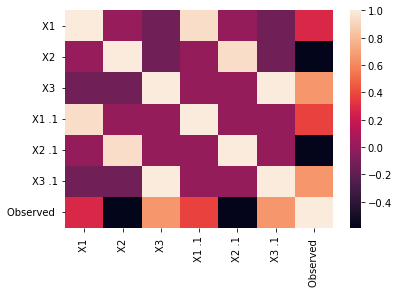

In [8]:
sns.heatmap(df.corr())

In [9]:
#X1,X2 and X3 are the coded values of the dataset while X1.1, X2.1, AND X3.1 are the actual values.
#From the heatmap above, we can see that there is high correlation between the actual values and the coded values
#so there is need to drop the coded values to eliminate multicollinearity

df.drop(columns=['X1 ', 'X2 ', 'X3 '], inplace=True)

In [10]:
df

,X1 .1,X2 .1,X3 .1,Observed
0,1,2,7.5,7.22
1,3,2,7.5,7.52
2,1,6,7.5,4.58
3,3,6,7.5,6.45
4,1,4,0.0,4.47
5,3,4,0.0,5.67
6,1,4,15.0,6.46
7,3,4,15.0,7.76
8,2,2,0.0,6.65
9,2,6,0.0,4.52


In [11]:
#There is need to rename the feature names to make readers of the code have an idea of the elements used in creating the xantan gum
new_feature_names={
    "X1 .1":"TIME (DAYS)",
    "X2 .1":"NH4NO3 (CONC)",
    "X3 .1":"KH2PO4 (CONC)"
}
df.rename(columns=new_feature_names, inplace=True)

In [12]:
df

,TIME (DAYS),NH4NO3 (CONC),KH2PO4 (CONC),Observed
0,1,2,7.5,7.22
1,3,2,7.5,7.52
2,1,6,7.5,4.58
3,3,6,7.5,6.45
4,1,4,0.0,4.47
5,3,4,0.0,5.67
6,1,4,15.0,6.46
7,3,4,15.0,7.76
8,2,2,0.0,6.65
9,2,6,0.0,4.52


<AxesSubplot:>

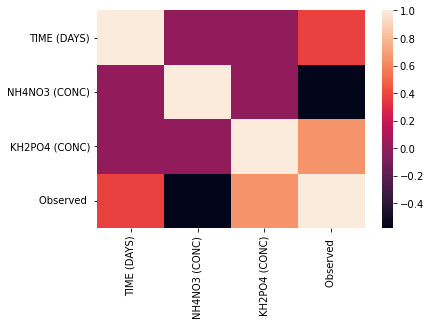

In [13]:
sns.heatmap(df.corr())

In [14]:
df.describe()

,TIME (DAYS),NH4NO3 (CONC),KH2PO4 (CONC),Observed
count,17.000000,17.000000,17.000000,17.000000
mean,2.000000,4.000000,7.500000,6.289412
std,0.707107,1.414214,5.303301,1.100945
min,1.000000,2.000000,0.000000,4.470000
25%,2.000000,4.000000,7.500000,5.810000
50%,2.000000,4.000000,7.500000,6.280000
75%,2.000000,4.000000,7.500000,6.930000
max,3.000000,6.000000,15.000000,8.310000


In [15]:
sc=StandardScaler()
scaled_df=sc.fit_transform(df)
df1=pd.DataFrame(scaled_df, columns= df.columns)
df1

,TIME (DAYS),NH4NO3 (CONC),KH2PO4 (CONC),Observed
0,-1.457738,-1.457738,0.000000,0.871277
1,1.457738,-1.457738,0.000000,1.152156
2,-1.457738,1.457738,0.000000,-1.600462
3,1.457738,1.457738,0.000000,0.150353
4,-1.457738,0.000000,-1.457738,-1.703451
5,1.457738,0.000000,-1.457738,-0.579933
6,-1.457738,0.000000,1.457738,0.159716
7,1.457738,0.000000,1.457738,1.376860
8,0.000000,-1.457738,-1.457738,0.337606
9,0.000000,1.457738,-1.457738,-1.656638


In [16]:
target="Observed "
y= df1[target]
X= df1.drop(columns=target)

In [17]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# SUPPORT VECTOR MACHINES

In [18]:
param_grid={
    "kernel":["rbf", "linear", "poly", "sigmoid"],
    "C":[1,10, 100, 1000, 10000],
    "gamma": [0.0001,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.9]
}

In [19]:
svr=SVR(epsilon=0.01)
svr.fit(X_train, y_train)

SVR(epsilon=0.01)

In [20]:
y_pred= svr.predict(X_test)
y_pred

array([ 0.09365911,  0.58741839, -0.07792646, -0.08421584])

In [21]:
r2_score(y_test,y_pred)

0.3975599361966572

In [22]:
mean_squared_error(y_test,y_pred)

0.2939997977141263

## EXTREME LEARNING MACHINE

In [25]:
pip install skelm

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement skelm (from versions: none)
ERROR: No matching distribution found for skelm


In [26]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.
